# Titatanic survivors data analysis

## Initialisation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Loading and preparing data

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)


Save the target variable

In [6]:
outcome = train.Survived
outcome.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Drop unnecessary variables

In [8]:
train.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
testId = test.PassengerId
test.drop(['PassengerId'], axis=1, inplace=True)
train['Test'] = False
test['Test'] = True
data = pd.concat([train, test], ignore_index=True)

## Data wrangling

In [9]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Test        1309 non-null bool
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 103.6+ KB


In [11]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [12]:
data.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Test           0
dtype: int64

### Sex

In [13]:
data['IsMale'] = (data.Sex == 'male')
data.drop('Sex', axis=1, inplace=True)

### Name

In [21]:
data['Title'] = data.Name.str.split(',').str[1].str.split().str[0]
freqTitles = set(data.Title.value_counts()[:4].index)
data['Title'] = data.Title.apply(lambda x: x if x in freqTitles else 'Rare')
data.drop('Name', axis=1, inplace=True)

In [24]:
data.Title.value_counts()

Mr.        757
Miss.      260
Mrs.       197
Master.     61
Rare        34
Name: Title, dtype: int64

### Pclass

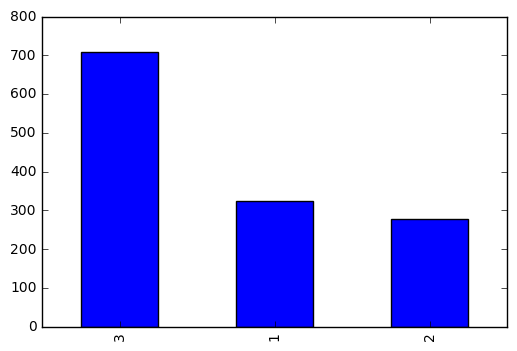

In [25]:
data.Pclass.value_counts().plot('bar')

### SibSp

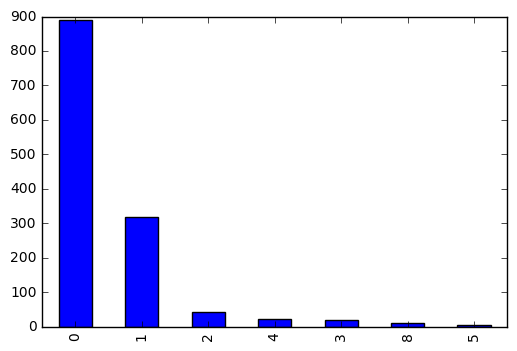

In [26]:
data.SibSp.value_counts().plot('bar')

### Parch

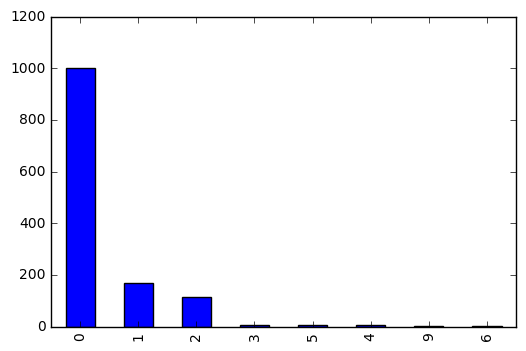

In [27]:
data.Parch.value_counts().plot('bar')

In [28]:
data['Family'] = data.SibSp + data.Parch

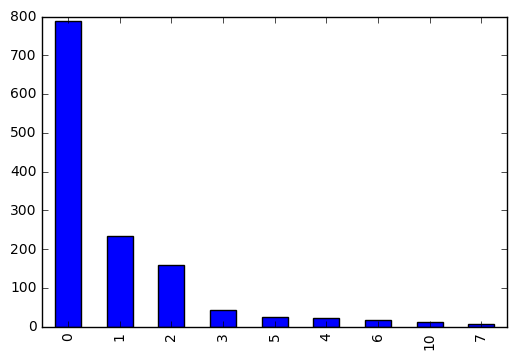

In [29]:
data.Family.value_counts().plot('bar')

### Fare

In [30]:
data[data.Fare == 0]

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test,IsMale,Title,Family
179,3,36.0,0,0,LINE,0.0,NaN,S,False,True,Mr.,0
263,1,40.0,0,0,112059,0.0,B94,S,False,True,Mr.,0
271,3,25.0,0,0,LINE,0.0,NaN,S,False,True,Mr.,0
277,2,NaN,0,0,239853,0.0,NaN,S,False,True,Mr.,0
302,3,19.0,0,0,LINE,0.0,NaN,S,False,True,Mr.,0
413,2,NaN,0,0,239853,0.0,NaN,S,False,True,Mr.,0
466,2,NaN,0,0,239853,0.0,NaN,S,False,True,Mr.,0
481,2,NaN,0,0,239854,0.0,NaN,S,False,True,Mr.,0
597,3,49.0,0,0,LINE,0.0,NaN,S,False,True,Mr.,0
633,1,NaN,0,0,112052,0.0,NaN,S,False,True,Mr.,0


In [31]:
data.Fare = data.Fare.where((data.Fare != 0) | (data.Ticket == 'LINE'))

In [32]:
data.isnull().sum()

Pclass         0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare          14
Cabin       1014
Embarked       2
Test           0
IsMale         0
Title          0
Family         0
dtype: int64

In [33]:
data.Fare = data.groupby('Pclass').Fare.transform(lambda x: x.fillna(x.mean()))

In [34]:
data.isnull().sum()

Pclass         0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       2
Test           0
IsMale         0
Title          0
Family         0
dtype: int64

### Embarked

In [35]:
data[data.Embarked.isnull()]

,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Test,IsMale,Title,Family
61,1,38.0,0,0,113572,80.0,B28,NaN,False,False,Miss.,0
829,1,62.0,0,0,113572,80.0,B28,NaN,False,False,Mrs.,0


In [36]:
data.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [37]:
data.Embarked = data.Embarked.where(~data.Embarked.isnull(), 'S')

In [38]:
data.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

### Cabin

In [39]:
data.isnull().sum()

Pclass         0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
Test           0
IsMale         0
Title          0
Family         0
dtype: int64

In [40]:
data['HasCabin'] = ~data.Cabin.isnull()

In [41]:
data.drop('Cabin', axis=1, inplace=True)

In [42]:
data.head()

,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked,Test,IsMale,Title,Family,HasCabin
0,3,22.0,1,0,A/5 21171,7.2500,S,False,True,Mr.,1,False
1,1,38.0,1,0,PC 17599,71.2833,C,False,False,Mrs.,1,True
2,3,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,Miss.,0,False
3,1,35.0,1,0,113803,53.1000,S,False,False,Mrs.,1,True
4,3,35.0,0,0,373450,8.0500,S,False,True,Mr.,0,False


### Ticket

In [43]:
# TODO Think of something to do with 'Ticket' variable

In [44]:
data.drop('Ticket', axis=1, inplace=True)

In [45]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Test,IsMale,Title,Family,HasCabin
0,3,22.0,1,0,7.2500,S,False,True,Mr.,1,False
1,1,38.0,1,0,71.2833,C,False,False,Mrs.,1,True
2,3,26.0,0,0,7.9250,S,False,False,Miss.,0,False
3,1,35.0,1,0,53.1000,S,False,False,Mrs.,1,True
4,3,35.0,0,0,8.0500,S,False,True,Mr.,0,False


### Age

Missing values in 'Age' variable will be treated later by constructing a linear regression.

In [46]:
data.isnull().sum()

Pclass        0
Age         263
SibSp         0
Parch         0
Fare          0
Embarked      0
Test          0
IsMale        0
Title         0
Family        0
HasCabin      0
dtype: int64

In [47]:
data['HasAge'] = ~data.Age.isnull()

In [48]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Test,IsMale,Title,Family,HasCabin,HasAge
0,3,22.0,1,0,7.2500,S,False,True,Mr.,1,False,True
1,1,38.0,1,0,71.2833,C,False,False,Mrs.,1,True,True
2,3,26.0,0,0,7.9250,S,False,False,Miss.,0,False,True
3,1,35.0,1,0,53.1000,S,False,False,Mrs.,1,True,True
4,3,35.0,0,0,8.0500,S,False,True,Mr.,0,False,True


### Dummy variables construction

In [49]:
data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Test,IsMale,Title,Family,HasCabin,HasAge
0,3,22.0,1,0,7.2500,S,False,True,Mr.,1,False,True
1,1,38.0,1,0,71.2833,C,False,False,Mrs.,1,True,True
2,3,26.0,0,0,7.9250,S,False,False,Miss.,0,False,True
3,1,35.0,1,0,53.1000,S,False,False,Mrs.,1,True,True
4,3,35.0,0,0,8.0500,S,False,True,Mr.,0,False,True


In [50]:
data = pd.get_dummies(data, columns=['Embarked', 'Title'])

### Some memory optimisation

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Pclass           1309 non-null int64
Age              1046 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Test             1309 non-null bool
IsMale           1309 non-null bool
Family           1309 non-null int64
HasCabin         1309 non-null bool
HasAge           1309 non-null bool
Embarked_C       1309 non-null uint8
Embarked_Q       1309 non-null uint8
Embarked_S       1309 non-null uint8
Title_Master.    1309 non-null uint8
Title_Miss.      1309 non-null uint8
Title_Mr.        1309 non-null uint8
Title_Mrs.       1309 non-null uint8
Title_Rare       1309 non-null uint8
dtypes: bool(4), float64(2), int64(4), uint8(8)
memory usage: 76.8 KB


In [52]:
for col in data.columns:
    if set(data[col]) == set((0,1)):
        data[col] = data[col].astype(bool)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Pclass           1309 non-null int64
Age              1046 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Test             1309 non-null bool
IsMale           1309 non-null bool
Family           1309 non-null int64
HasCabin         1309 non-null bool
HasAge           1309 non-null bool
Embarked_C       1309 non-null bool
Embarked_Q       1309 non-null bool
Embarked_S       1309 non-null bool
Title_Master.    1309 non-null bool
Title_Miss.      1309 non-null bool
Title_Mr.        1309 non-null bool
Title_Mrs.       1309 non-null bool
Title_Rare       1309 non-null bool
dtypes: bool(12), float64(2), int64(4)
memory usage: 76.8 KB


### Linear model for NaN's in 'Age' variable

In [54]:
lr = LinearRegression()
X = data.ix[~data.Age.isnull(), data.columns != 'Age']
y = data.ix[~data.Age.isnull(), 'Age']

In [55]:
y.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [56]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lr.coef_

array([ -5.74084585e+00,  -8.63432656e-01,   3.30007053e-01,
         9.85786172e-03,  -2.90531538e-01,   1.35190933e+01,
        -5.33425603e-01,   7.47199823e-01,  -1.77635684e-15,
        -3.09953389e+00,   4.58888629e+00,  -1.48935240e+00,
        -2.36371856e+01,   1.59010008e+00,  -7.61305775e-01,
         1.56729379e+01,   7.13545338e+00])

In [58]:
pd.Series(lr.coef_, index=data.columns[data.columns!='Age']).sort_values()

Title_Master.   -2.363719e+01
Pclass          -5.740846e+00
Embarked_C      -3.099534e+00
Embarked_S      -1.489352e+00
SibSp           -8.634327e-01
Title_Mr.       -7.613058e-01
Family          -5.334256e-01
Test            -2.905315e-01
HasAge          -1.776357e-15
Fare             9.857862e-03
Parch            3.300071e-01
HasCabin         7.471998e-01
Title_Miss.      1.590100e+00
Embarked_Q       4.588886e+00
Title_Rare       7.135453e+00
IsMale           1.351909e+01
Title_Mrs.       1.567294e+01
dtype: float64

In [59]:
agePred = np.maximum(lr.predict(data.ix[data.Age.isnull(), data.columns != 'Age']), 1)

In [60]:
data.ix[data.Age.isnull(), 'Age'] = agePred

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 18 columns):
Pclass           1309 non-null int64
Age              1309 non-null float64
SibSp            1309 non-null int64
Parch            1309 non-null int64
Fare             1309 non-null float64
Test             1309 non-null bool
IsMale           1309 non-null bool
Family           1309 non-null int64
HasCabin         1309 non-null bool
HasAge           1309 non-null bool
Embarked_C       1309 non-null bool
Embarked_Q       1309 non-null bool
Embarked_S       1309 non-null bool
Title_Master.    1309 non-null bool
Title_Miss.      1309 non-null bool
Title_Mr.        1309 non-null bool
Title_Mrs.       1309 non-null bool
Title_Rare       1309 non-null bool
dtypes: bool(12), float64(2), int64(4)
memory usage: 76.8 KB


### Split the data back to training and testing sets

In [62]:
train = data[data.Test == 0].drop('Test', axis=1).copy()
test = data[data.Test == 1].drop('Test', axis=1).copy()

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 17 columns):
Pclass           891 non-null int64
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
IsMale           891 non-null bool
Family           891 non-null int64
HasCabin         891 non-null bool
HasAge           891 non-null bool
Embarked_C       891 non-null bool
Embarked_Q       891 non-null bool
Embarked_S       891 non-null bool
Title_Master.    891 non-null bool
Title_Miss.      891 non-null bool
Title_Mr.        891 non-null bool
Title_Mrs.       891 non-null bool
Title_Rare       891 non-null bool
dtypes: bool(11), float64(2), int64(4)
memory usage: 58.3 KB


In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 891 to 1308
Data columns (total 17 columns):
Pclass           418 non-null int64
Age              418 non-null float64
SibSp            418 non-null int64
Parch            418 non-null int64
Fare             418 non-null float64
IsMale           418 non-null bool
Family           418 non-null int64
HasCabin         418 non-null bool
HasAge           418 non-null bool
Embarked_C       418 non-null bool
Embarked_Q       418 non-null bool
Embarked_S       418 non-null bool
Title_Master.    418 non-null bool
Title_Miss.      418 non-null bool
Title_Mr.        418 non-null bool
Title_Mrs.       418 non-null bool
Title_Rare       418 non-null bool
dtypes: bool(11), float64(2), int64(4)
memory usage: 27.3 KB


### Save prepared datasets to pickle

In [65]:
train.to_pickle('../data/train_prep.pkl')
test.to_pickle('../data/test_prep.pkl')